In [1]:
# Needed for functions
import numpy as np

# Needed for notebooks
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Speccy
import acf
import psd
# import sick_tricks as gary
import utils as ut
import sample

### Keep Matern problem

In [2]:
n = 2000
ff = ut.calc_ff(n)
sigma = 1e-6

params = [1, 5/6+2, 0.1]

### Generate data
Use Gaussian sample and random amplitude sample

/Users/00077063/Documents/PostDoc/20230714_speccy/speccy/notebooks/acf.py:17: RuntimeWarning: invalid value encountered in multiply
  K *= K_nu(nu, np.abs(lmbda * dx))


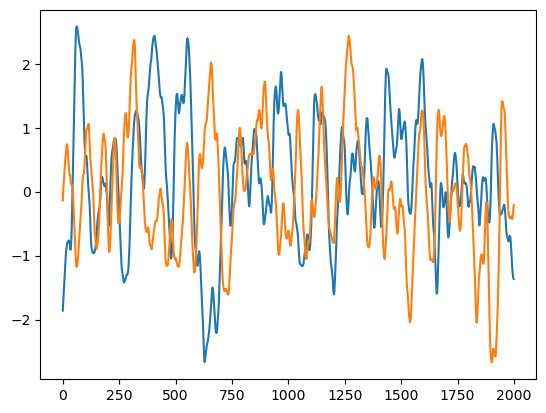

In [7]:
acf_true = acf.matern(np.arange(n), params, sigma = sigma);

gauss_sample = sample.mv_gaussian(acf_true)
ra_sample = sample.random_amplitudes(psd.matern, params, n, 1)

plt.plot(gauss_sample)
plt.plot(ra_sample)